<a href="https://colab.research.google.com/github/ykykyk112/machine_learning/blob/main/SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import cv2
from google.colab import drive
from PIL import Image

In [ ]:
mnist = fetch_openml('mnist_784')
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
X = mnist['data']
y = mnist['target']

In [ ]:
# dataset upzip code
#!unzip /content/drive/MyDrive/Colab_Notebooks/image/Test_set.zip -d /content/drive/MyDrive/Colab_Notebooks/image
#!unzip /content/drive/MyDrive/Colab_Notebooks/image/Training_set.zip -d /content/drive/MyDrive/Colab_Notebooks/image

In [ ]:
print(X.shape)
image = X[0].reshape(28, 28)
image.shape

(70000, 784)


(28, 28)

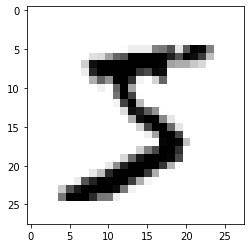

In [ ]:
plt.imshow(image, cmap = 'binary')
plt.show()

In [ ]:
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
y.shape

(70000,)

In [2]:
test = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/image/Test_set/Avocado/000.jpg', cv2.IMREAD_COLOR)
nonetype = type(test)

In [ ]:
fruit_name = ['Avocado', 'Banana', 'Blueberry', 'Chestnut', 'Corn', 'Kiwi', 'Lemon', 'Mango', 'Orange', 'Peach', 'Pear', 'Strawberry']
path_for_test = '/content/drive/MyDrive/Colab_Notebooks/image/Test_set/'
path_for_training = '/content/drive/MyDrive/Colab_Notebooks/image/Training_set/'

# test_data = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/image/Test_set/Avocado/001.jpg', cv2.IMREAD_COLOR)
# test_data = test_data.reshape(1, 10000, 3)
# training_data = cv2.cv2.imread('/content/drive/MyDrive/Colab_Notebooks/image/Training_set/Avocado/001.jpg', cv2.IMREAD_COLOR)

# for name in fruit_name :
#     folder = '/content/drive/MyDrive/Colab_Notebooks/image/Test_set/{}/'.format(name)
#     for i in range(300) :
#         file_name = folder+'{:03d}.jpg'.format(i+1)
#         image = cv2.imread(file_name, cv2.IMREAD_COLOR)
#         if type(image) is nonetype :
#             print('{0} 종료'.format(name))
#             break
#         image_scaled = image/255
#         image_reshaped = image_scaled.reshape(1, 10000, 3)
#         test_data = np.append(test_data, image_reshaped, axis = 0)
#     print('for {0} - {1} complete'.format(name, i))

def make_ndarray(path, fruit_name) :
    first = True
    for index, name in enumerate(fruit_name) :
        folder = path + '{}/'.format(name)
        for i in range(500) :
            file_name = folder+'{:03d}.jpg'.format(i+1)
            if first :
                input_image = cv2.imread(file_name, cv2.IMREAD_COLOR)
                image_set = input_image.reshape(1, 100, 100, 3)
                data_set = input_image/255
                data_set = data_set.reshape(1, 10000, 3)
                label_set = np.array([str(index)])
                first = False
                if type(input_image) is nonetype :
                    print('return -1')
                    return
            else :
                input_image = cv2.imread(file_name, cv2.IMREAD_COLOR)
                if type(input_image) is nonetype :
                    print('{0} 종료'.format(name))
                    break
                for_image_set = input_image.reshape(1, 100, 100, 3)
                image_set = np.append(image_set, for_image_set, axis = 0)
                image_scaled = input_image/255
                image_reshaped = image_scaled.reshape(1, 10000, 3)
                data_set = np.append(data_set, image_reshaped, axis = 0)
                arr = np.array([str(index)])
                label_set = np.append(label_set, arr, axis = 0)
        print('for {0} - {1} complete'.format(name, i))
        print("data set's shape : {}".format(data_set.shape))
    return data_set, image_set, label_set

test_data, test_image, test_label = make_ndarray(path_for_test, fruit_name)
training_data, training_image, training_label = make_ndarray(path_for_training, fruit_name)

Avocado 종료
for Avocado - 143 complete
data set's shape : (143, 10000, 3)
Banana 종료
for Banana - 166 complete
data set's shape : (309, 10000, 3)
Blueberry 종료
for Blueberry - 154 complete
data set's shape : (463, 10000, 3)
Chestnut 종료
for Chestnut - 153 complete
data set's shape : (616, 10000, 3)
Corn 종료
for Corn - 150 complete
data set's shape : (766, 10000, 3)
Kiwi 종료
for Kiwi - 156 complete
data set's shape : (922, 10000, 3)
Lemon 종료
for Lemon - 164 complete
data set's shape : (1086, 10000, 3)
Mango 종료
for Mango - 166 complete
data set's shape : (1252, 10000, 3)
Orange 종료
for Orange - 160 complete
data set's shape : (1412, 10000, 3)
Peach 종료
for Peach - 164 complete
data set's shape : (1576, 10000, 3)
Pear 종료
for Pear - 164 complete
data set's shape : (1740, 10000, 3)
Strawberry 종료
for Strawberry - 164 complete
data set's shape : (1904, 10000, 3)
Avocado 종료
for Avocado - 427 complete
data set's shape : (427, 10000, 3)
Banana 종료
for Banana - 490 complete
data set's shape : (917, 10000,

In [4]:
X_test = np.load('/content/drive/MyDrive/Colab_Notebooks/image/test_data_shuffled.npy')
X_train = np.load('/content/drive/MyDrive/Colab_Notebooks/image/training_data_shuffled.npy')
y_test = np.load('/content/drive/MyDrive/Colab_Notebooks/image/test_label_shuffled.npy')
y_train = np.load('/content/drive/MyDrive/Colab_Notebooks/image/training_label_shuffled.npy')
image_test = np.load('/content/drive/MyDrive/Colab_Notebooks/image/test_image_shuffled.npy')
image_training = np.load('/content/drive/MyDrive/Colab_Notebooks/image/training_image_shuffled.npy')

print(X_test.shape)
print(X_train.shape)

(1904, 10000, 3)
(5682, 10000, 3)


In [ ]:
fruit_name = ['Avocado', 'Banana', 'Blueberry', 'Chestnut', 'Corn', 'Kiwi', 'Lemon', 'Mango', 'Orange', 'Peach', 'Pear', 'Strawberry']
first = True
for index, name in enumerate(fruit_name) :
    if first :
        target = np.array([str(index)])
        first = False
    else :
        arr = np.array([str(index)])
        target = np.append(target, arr, axis = 0)
print(target.shape)
print(target)
print(y.shape)

S = np.arange(target.shape[0])
np.random.shuffle(S)

target = target[S]
print(target)

def shuffle_data_label(data, label) :
    idx = np.arange(data.shape[0])
    np.random.shuffle(idx)
    data = data[idx]
    label = label[idx]
    return data, shuffle_data_label



(12,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11']
(70000,)
['2' '0' '7' '10' '6' '3' '9' '4' '11' '1' '8' '5']


In [ ]:
def shuffle_ndarray(data, image, label) :
    idx = np.arange(data.shape[0])
    np.random.shuffle(idx)
    data = data[idx]
    image = image[idx]
    label = label[idx]
    return data, image, label

test_data_shuffled, test_image_shuffled, test_label_shuffled = shuffle_ndarray(test_data, test_image, test_label)
training_data_shuffled, training_image_shuffled, training_label_shuffled = shuffle_ndarray(training_data, training_image, training_label)

In [ ]:
print(test_data_shuffled.shape, test_image_shuffled.shape, test_label_shuffled.shape)
print(training_data_shuffled.shape, training_image_shuffled.shape, training_label_shuffled.shape)

(1904, 10000, 3) (1904, 100, 100, 3) (1904,)
(5682, 10000, 3) (5682, 100, 100, 3) (5682,)


In [ ]:
np.save('/content/drive/MyDrive/Colab_Notebooks/image/test_data_shuffled', test_data_shuffled)
np.save('/content/drive/MyDrive/Colab_Notebooks/image/test_image_shuffled', test_image_shuffled)
np.save('/content/drive/MyDrive/Colab_Notebooks/image/test_label_shuffled', test_label_shuffled)
np.save('/content/drive/MyDrive/Colab_Notebooks/image/training_data_shuffled', training_data_shuffled)
np.save('/content/drive/MyDrive/Colab_Notebooks/image/training_image_shuffled', training_image_shuffled)
np.save('/content/drive/MyDrive/Colab_Notebooks/image/training_label_shuffled', training_label_shuffled)

In [ ]:
test_data_reshaped = test_data_shuffled.reshape(1904, 30000)
training_data_reshaped = training_data_shuffled.reshape(5682, 30000)
print(test_data_reshaped.shape)
print(training_data_reshaped.shape)

(1904, 30000)
(5682, 30000)


In [ ]:
from sklearn.svm import SVC
linear_svc = SVC(kernel = 'linear', random_state=42)
rbf_svc = SVC(kernel = 'rbf', random_state=42)
poly_svc = SVC(kernel = 'poly', random_state=42)
sigmoid_svc = SVC(kernel = 'sigmoid', random_state=42)

linear_svc.fit(training_data_reshaped, training_label_shuffled)
rbf_svc.fit(training_data_reshaped, training_label_shuffled)
poly_svc.fit(training_data_reshaped, training_label_shuffled)
sigmoid_svc.fit(training_data_reshaped, training_label_shuffled)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
pred_linear = linear_svc.predict(test_data_reshaped)
pred_rbf = rbf_svc.predict(test_data_reshaped)
pred_poly = poly_svc.predict(test_data_reshaped)
pred_sigmoid = sigmoid_svc.predict(test_data_reshaped)

linear_score = accuracy_score(pred_linear, test_label_shuffled)
rbf_score = accuracy_score(pred_rbf, test_label_shuffled)
poly_score = accuracy_score(pred_poly, test_label_shuffled)
sigmoid_score = accuracy_score(pred_sigmoid, test_label_shuffled)

print(linear_score)
print(rbf_score)
print(poly_score)
print(sigmoid_score)

0.9464285714285714
0.9364495798319328
0.9480042016806722
0.045168067226890755


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_label_shuffled, pred_data)
print(cf)

[[141   0   0   0   0   0   0   0   0   2   0   0]
 [  0 150   0   0   0   0  16   0   0   0   0   0]
 [  0   0 154   0   0   0   0   4   6   0   0   0]
 [  0  19   0 145   0   0   0   0   0   0   0   0]
 [  0   0   0   0 154   0   0   0   0   0   0   0]
 [  0   0   0   0   0 153   0   0   0   0   0   0]
 [  0   0  11   0   0   0 103   7  29   0   0   0]
 [  0   0   6   0   0   0   0 150   0   0   0   0]
 [  0   0   0   0   0   0   0   0 164   0   0   0]
 [  0   0   0   0   0   0   0   0   0 166   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160   0]
 [  0   0   0   0   0   0   0   4   0   0   0 160]]


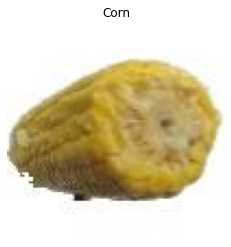

In [ ]:
def plot_image(image, label) :
    fruit_map = {'0':'Avocado', '1':'Banana', '2':'Blueberry', '3':'Chestnut', '4':'Corn', '5':'Kiwi', '6':'Lemon', 
                 '7':'Mango', '8':'Orange', '9':'Peach', '10':'Pear', '11':'Strawberry'}
    plt.imshow(image)
    plt.axis('off')
    plt.title('{}'.format(fruit_map[label]))
    plt.show()

sample = test_data_reshaped[9]
sample_image = test_image_shuffled[9]
sample_label = test_label_shuffled[9]

sample_image_cvt = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plot_image(sample_image_cvt, sample_label)

In [8]:
from sklearn.preprocessing import StandardScaler
X_test = X_test.reshape(X_test.shape[0], 30000)
X_train = X_train.reshape(X_train.shape[0], 30000)
std_scaler = StandardScaler()
X_test_scaled = std_scaler.fit_transform(X_test)
X_train_scaled = std_scaler.fit_transform(X_train)

In [26]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'poly', random_state=42, C = 1, probability=True)
svm_clf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = svm_clf.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)

0.9480042016806722


In [28]:
y_pred_proba = svm_clf.predict_proba(X_test)
print(y_pred_proba)

[[6.80227172e-05 5.48668790e-04 3.52914113e-03 ... 1.08231265e-04
  8.05554311e-05 3.06693740e-04]
 [5.15510177e-02 3.75650910e-04 3.03123732e-04 ... 1.25908111e-03
  1.31410728e-04 5.15018331e-04]
 [9.57290077e-03 2.16658486e-04 1.12726671e-03 ... 1.10624151e-03
  2.79313441e-03 9.54860188e-01]
 ...
 [2.87458264e-04 2.14267256e-04 2.70290201e-04 ... 3.55915077e-04
  9.93474358e-01 3.32699758e-03]
 [7.33957563e-03 2.64484979e-04 1.32871736e-03 ... 1.25790979e-03
  2.20485978e-03 9.51016027e-01]
 [1.68608180e-01 2.19311517e-04 4.95084054e-04 ... 1.62522806e-03
  1.74978035e-04 4.84989913e-04]]


In [32]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 144,   0,   0,   0,   0,  22,   0,   0,   0,   0,   0],
       [  0,   0, 164,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 164,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 154,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0, 147,   0,   0,   0,   0,   0,   0],
       [  0,   0,  15,   0,   0,   0,  79,   0,  56,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 156,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 164,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 166,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 160,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 164]])

# 새 섹션